<h1 align = 'center'> Tumor Diagnosis: EDA Workshop</h1>

#Introduction:
Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) to:

maximize insight into a data set;

uncover underlying structure;

extract important variables;

detect outliers and anomalies;

#About the Dataset:
The [ Breast Cancer Diagnostic data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the UCI Machine Learning Repository. This database is also available through the UW CS ftp server[ UW CS ftp server](https://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


**Attribute Information:**


*   ID number
*   Diagnosis (M = malignant, B = benign) 3-32)



Ten real-valued features are computed for each cell nucleus:
1.   radius (mean of distances from center to points on the perimeter)
2.   texture (standard deviation of gray-scale values)
3.   perimeter
4.   area
5.   smoothness (local variation in radius lengths)
6.   compactness (perimeter^2 / area - 1.0)
7.   concavity (severity of concave portions of the contour)
8.   concave points (number of concave portions of the contour)
9.   symmetry
10.   fractal dimension ("coastline approximation" - 1)



The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

##Step 1: Loading Libraries and Data

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/data.csv')

##Step 2: Separate Target from Features


After loading the csv file that contains the Tumor Diagnosis dataset, we proceed to checking first the content of the csv file and get a preliminairy check before we pass to data wrangling and visualization.



1.   We will first have a sneak peek on the rows and columns using "head()" function.
2.   Second, we will check values count each in each column and the corresponding data type using "info()" function.
3.   Third, we will pull out the descriptive statistics summary of the data, a thourough statistical description of the data in each column with the help of the "describe()" function.

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


As we can see here, we have a full summary of the:


1.   values count
2.   calculated average (mean).
3.   standard deviation.
4.   minimum value.
5.   1st quantile.
6.   2nd quantile (median value).
7.   3rd quantile.
8.   maximum value.



As much info as this summary provides, analyzing raw numbers for non statisticians can be quite exhausting. Therfore, we will see in the next sections how can we turn these numbers into visual graphs that will help us understand more the data.

Just before we proceed, we will seperate our data into X values (the independent variables or features values) and Y (the dependent variable or the target values).</font>

In [ ]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:

# columns gives columns names in data
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
# y includes our labels and x includes our features
# labels are: M: Malignant and B: Benign
y = data.diagnosis
list = ['Unnamed: 32','id','diagnosis'] #we don't need these columns so we are dropping them
x = data.drop(list, axis = 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#**Data Visualization**
____________________________________________________________

##Step 1: Plot Diagnosis Distributions

Now let's get on with the Exploratory Data Analysis! Let' first check the distribution of the Y labels using a countplot.

(Note: it is advisable to consider the labels count for each class for classification process. Training a model with unbalanced classes count will result in creating a weak model)

In [ ]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

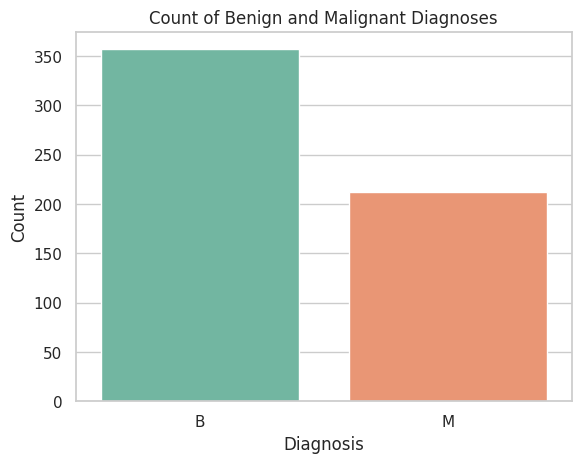

In [ ]:
count_data = y.value_counts()

# Create the count plot
ax = sns.barplot(x=count_data.index, y=count_data.values, palette="Set2")

# Set labels and title
ax.set_xlabel("Diagnosis")
ax.set_ylabel("Count")
ax.set_title("Count of Benign and Malignant Diagnoses")

# Show the plot
plt.show()


##Step 2: Visualizing Standardized Data with Seaborn

###Violin plot

A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. (Wikipedia)

Here we will use the violin plot to visualize the distribution of the first 10 columns of the data.By checking the distribution of data in those columns we can pull out certain observation like data correlation and make comparison between the distributions to see if similair or different.

The standarisation of data using the Z-score normalization is for the aim of rescaling and centering the data distributions around the same location so we can visualize it properly.

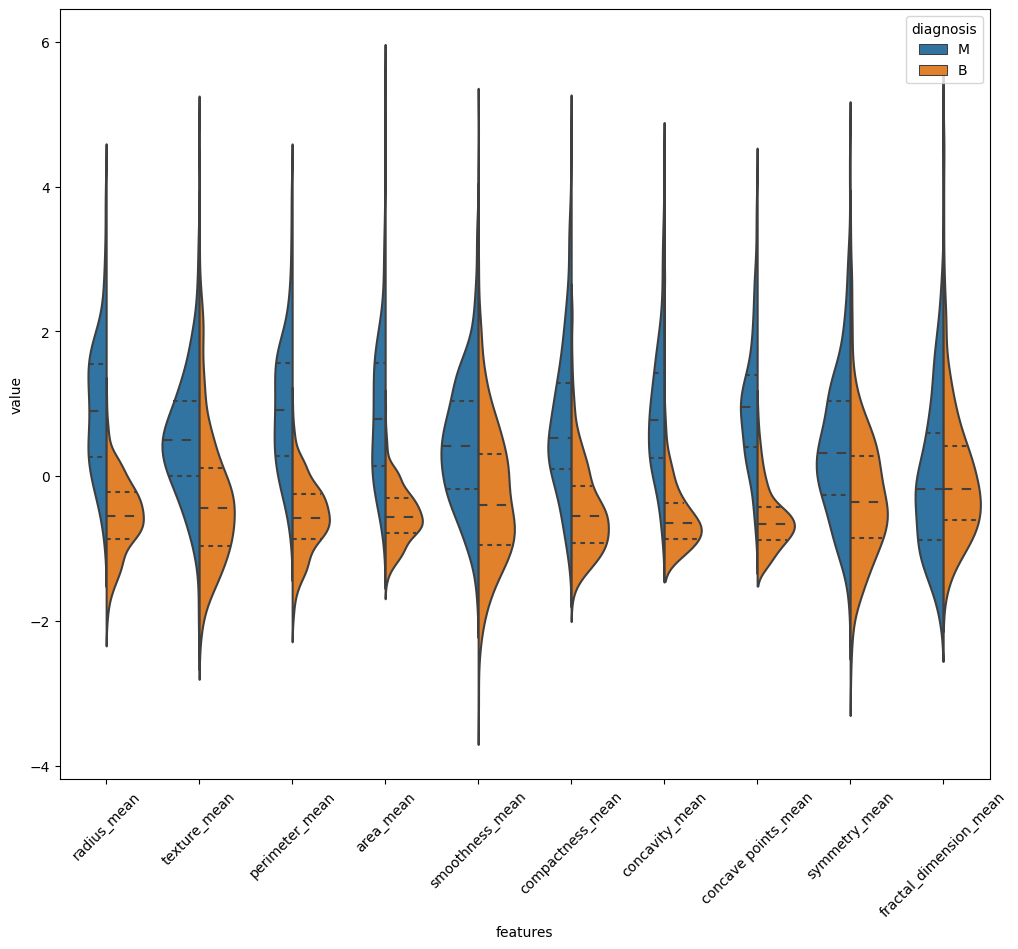

In [ ]:
target = y
features = x
# standardization (Z-score normalization)
features_stand = (features - features.mean()) / (features.std())
# first ten features
features = pd.concat([y, features_stand.iloc[:,0:10]],axis=1)
features = pd.melt(features,
                   id_vars="diagnosis",
                   var_name="features",
                   value_name='value')

plt.figure(figsize=(12,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=features, split=True, inner="quart")
plt.xticks(rotation=45);

**What insights can we draw from this 1st plot?**



1.   ÉThe "concavity_mean" and "concave points_mean" have a nearly identical distribution the same as "perimeter_mean" and "area_mean". Consequently, and based on this insight, we can take action and drop one of the two columns with identical distribution for the classification process.
2.   The "texture_mean" distribution for the two classes have nearly the same spread (same variation) but centered around different locations (different median position). This means that the "texture_mean" column data can be of high value for classification.
3.   The "radius_mean" column data have different variation and location for the distribution of each class. Also, valuable for classification.
4.   The "fractal_dimension_mean" column data have an identical distribution for both classes which mean that the data for this column are of low value.

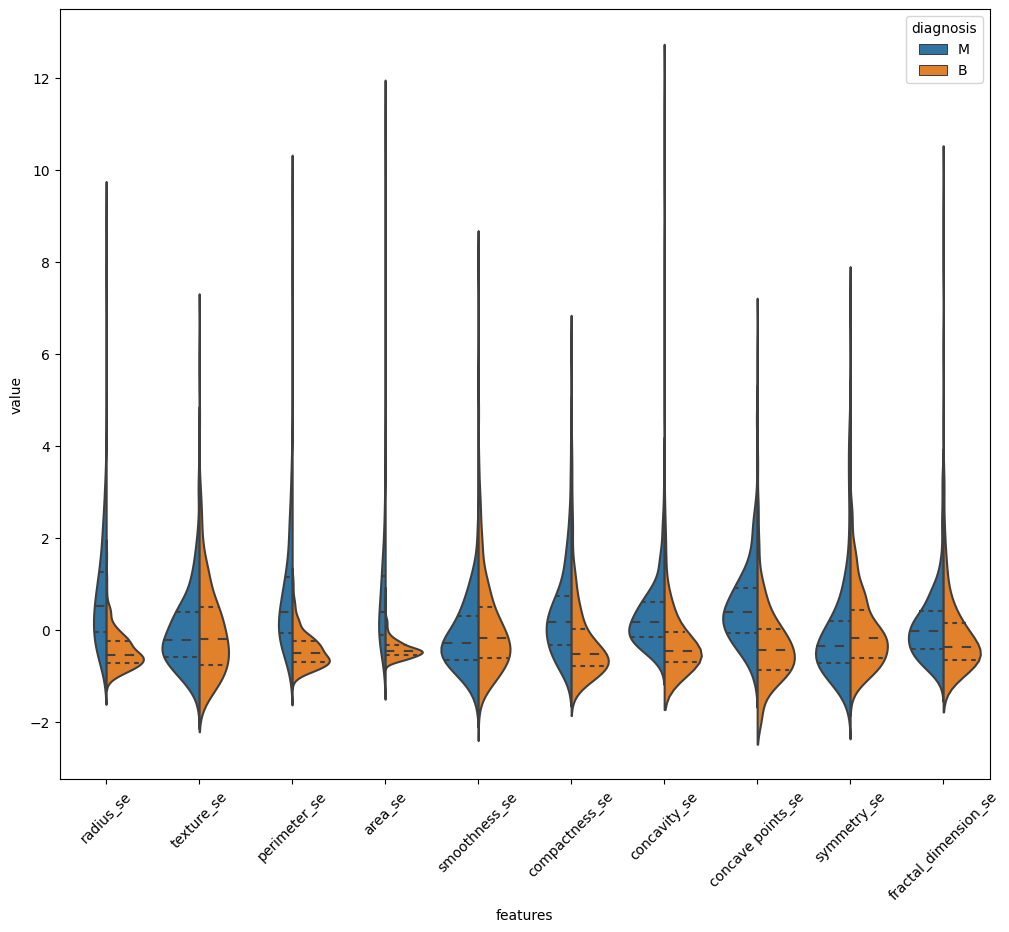

In [ ]:
# Second ten features
features = pd.concat([y,features_stand.iloc[:,10:20]],axis=1)
features = pd.melt(features,
                   id_vars="diagnosis",
                   var_name="features",
                   value_name='value')

plt.figure(figsize=(12,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=features, split=True, inner="quart")
plt.xticks(rotation=45);

**What insights can we draw from this 2nd violin plot?**


1.   We notice that all the distributions of these 10 columns have long tails which probably means that there are a numbr of outliers in the data.
2.   The "radius_se", "perimeter_se", and "area_se" may probably be with high value for classification.

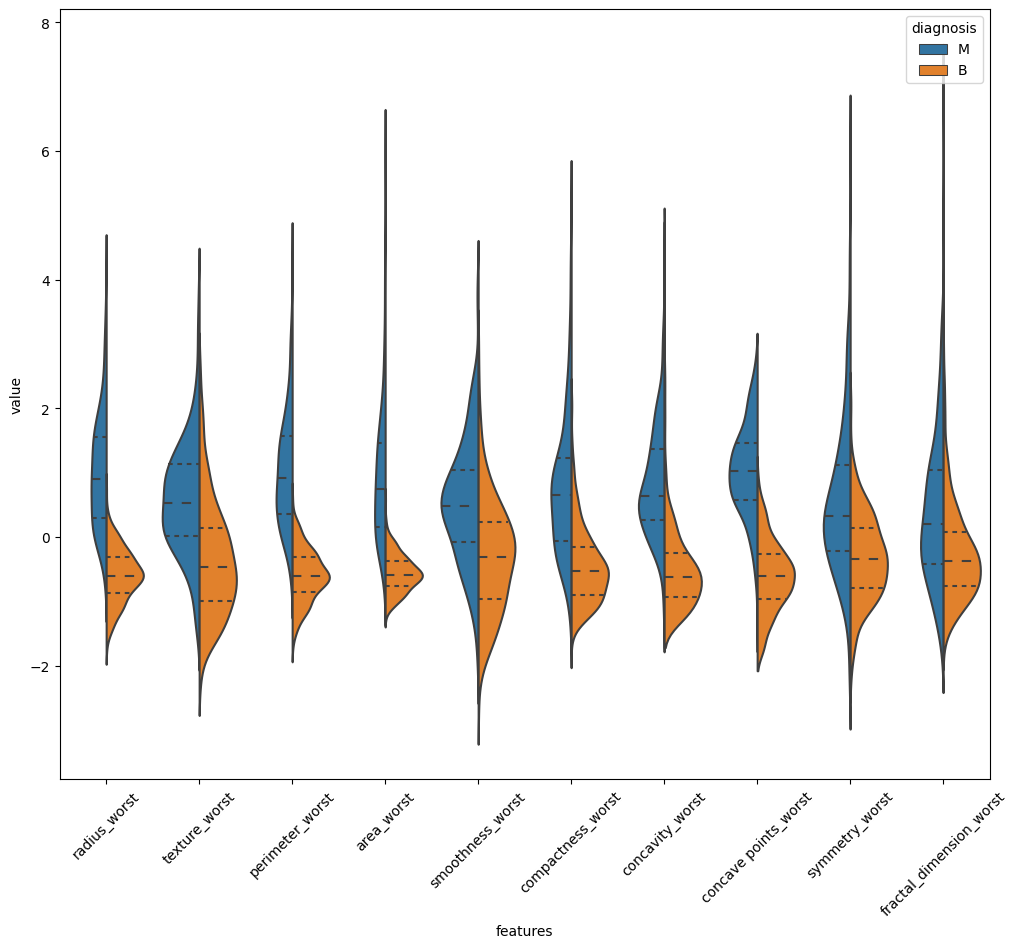

In [ ]:
# Third ten features
features = pd.concat([y,features_stand.iloc[:,20:31]],axis=1)
features = pd.melt(features,
                   id_vars="diagnosis",
                   var_name="features",
                   value_name='value')

plt.figure(figsize=(12,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=features ,split=True, inner="quart")
plt.xticks(rotation=45);

###Box plot
Box plots are useful in terms of seeing outliers. However, in terms of data representation violin plots show much usefulness than box plots.

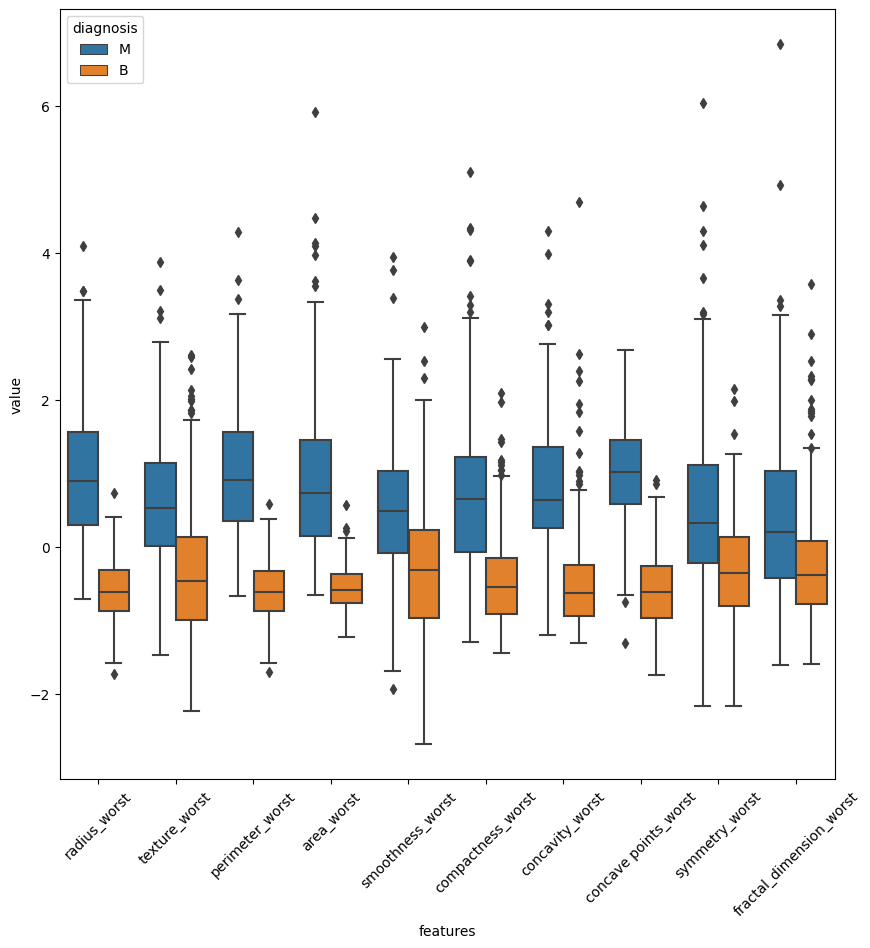

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=features)
plt.xticks(rotation=45);

##Step 3: Using Joint Plots for Feature Comparison
#Combining univariate and bivariate analysis
A Jointplot comprises three plots. Out of the three, one plot displays a bivariate graph which shows how the dependent variable(Y) varies with the independent variable(X). Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X). The third plot is placed on the right margin of the bivariate graph with the orientation set to vertical and it shows the distribution of the dependent variable(Y).

The combination of univariate and bivariate plots in the same graph is very intuitive and usefull for data analysis. The bivariate plot is the highlight addition since it describes the relationship between two variables which will help us determine whether these two variable are correlated or not.

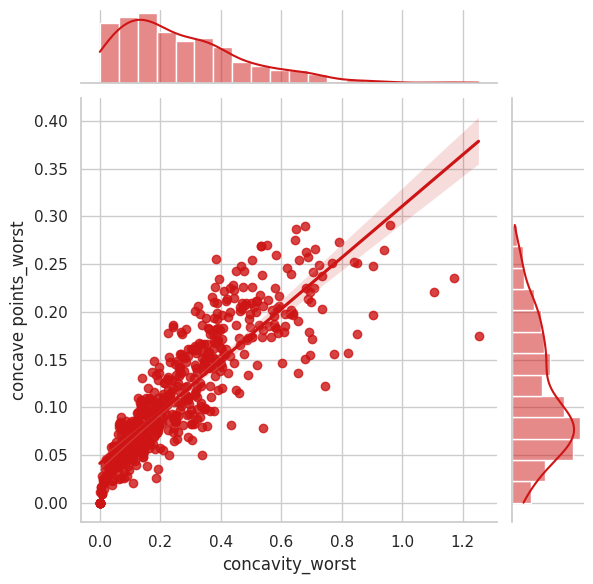

In [ ]:
sns.jointplot(
    x='concavity_worst',  # Column name in your DataFrame
    y='concave points_worst',  # Column name in your DataFrame
    data=x,  # Your DataFrame
    kind="reg",  # Plot kind (regression plot)
    color="#ce1414"  # Color for the plot
)


**What insight can we draw from this joint plot?**

The "concave points_worst" and the "concavity_worst" features have a positive correlation. This means that we could use only one of these two feature as an input to our classifier.

##Step 4: Uncovering Correlated Features with Pair Grids
PairGrip plot uses different pair of variables for each subplot and it combines these subplots into a full matrix. The provided subplots can be tweeked to show different type of plots (kde, hist, scatter, etc.) but the main goal is to visualize the bivariate relationship between the variables.

In [ ]:
sns.set(style="white")
features = x.loc[:,['radius_worst','perimeter_worst','area_worst']]

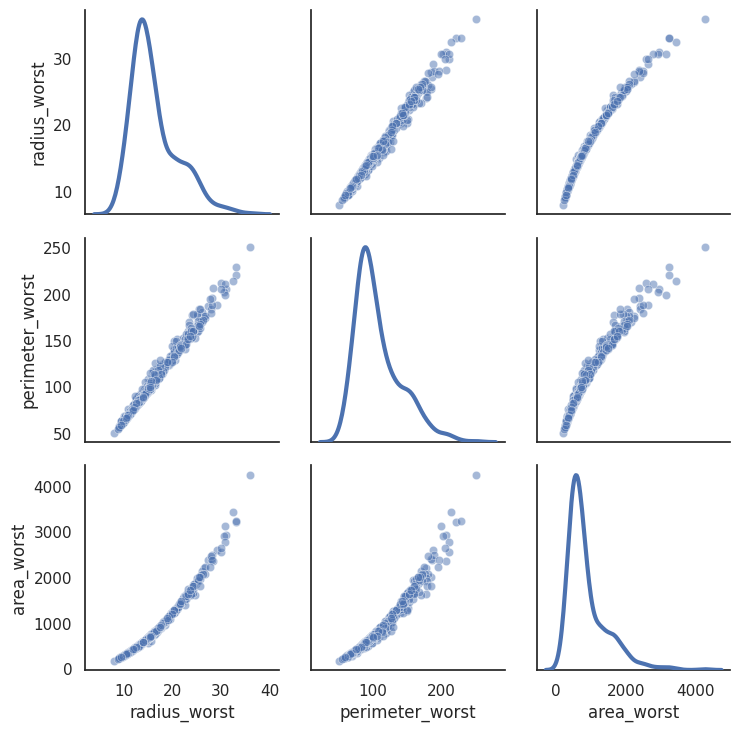

In [ ]:
sns.set(style="white")

features = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(features, diag_sharey=False)

g.map_diag(sns.kdeplot, lw=3);
g.map_offdiag(sns.scatterplot, alpha=0.5);
#g.map_lower(sns.kdeplot, cmap="Blues_d");
#g.map_upper(plt.scatter);

##Step 5: Observing the Distribution of Values and their Variance with Swarm Plots
Swarm plots are the perfect tool that provide us with better representation of data distribution when it comes to data variation analysis. As we can see in the figure below, each feature's distribution is represented by the bee swarm like points. The locations of points are adjusted automatically to avoid overlap.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 32.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 39.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 30.1% of the points cannot be plac

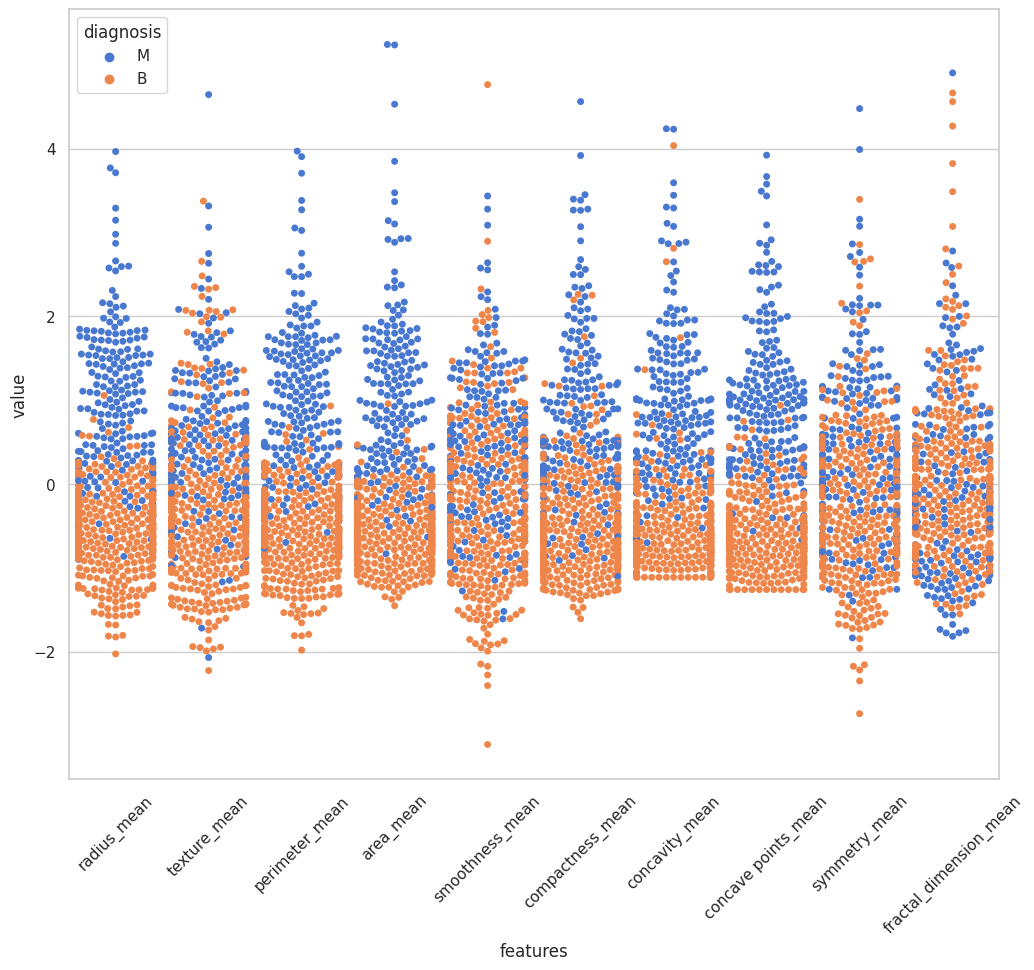

In [ ]:
sns.set(style="whitegrid", palette="muted")

target = y
features = x
features_stand = (features - features.mean()) / (features.std())
features = pd.concat([y,features_stand.iloc[:,0:10]],axis=1)
features = pd.melt(features,
                   id_vars="diagnosis",
                   var_name="features",
                   value_name='value')

plt.figure(figsize=(12,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=features);
plt.xticks(rotation=45);

**What insights can we draw from this swarm plot?**

As we can see, for certain features such as "fractal_dimension_mean", the distribution for each of the two classes is overlapping with the other one and so we conclude that for this feature the classification task will be difficult for it cannot easily seperate the two points distributions. In addition, and most importantly, the swarm plot describes visually the data variation and can show us whether our data is distributed tightly in small cluster or widely with spaced data points and many outliers.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 59.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 62.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 67.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 56.2% of the points cannot be plac

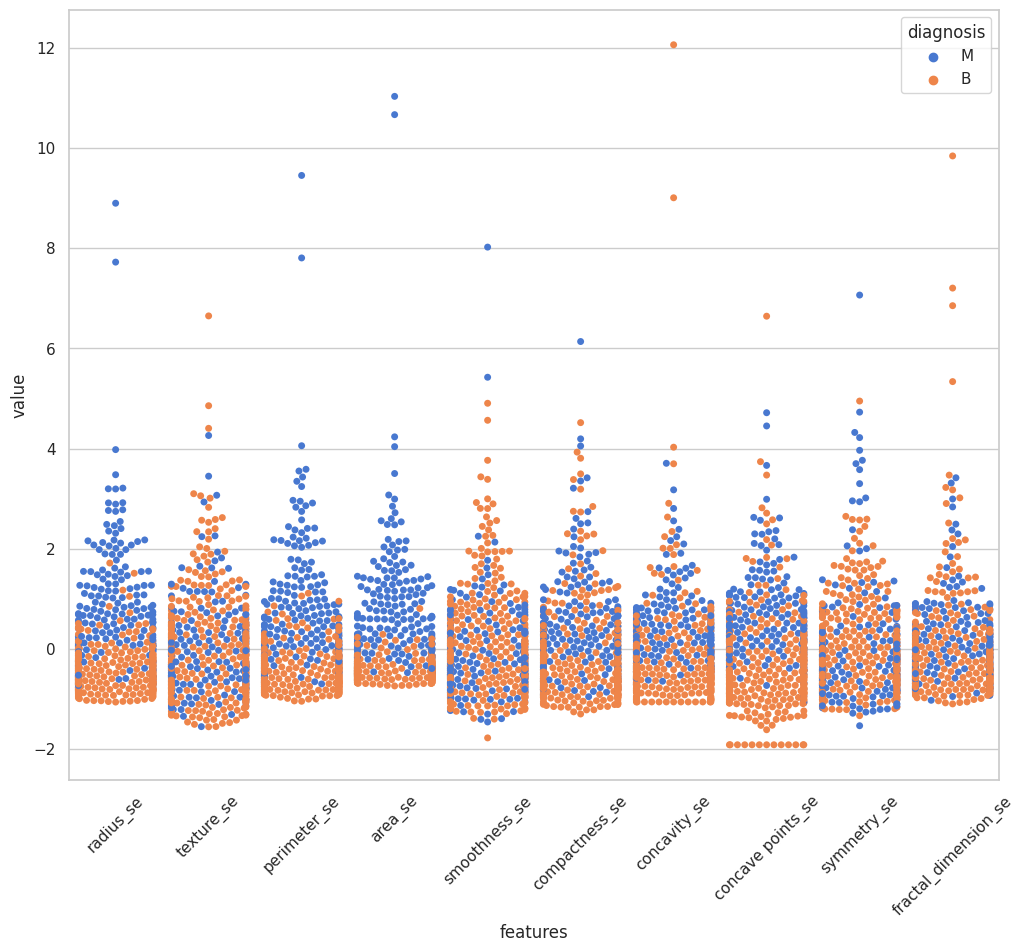

In [ ]:
features = pd.concat([y,features_stand.iloc[:,10:20]],axis=1)
features = pd.melt(features,
                   id_vars="diagnosis",
                   var_name="features",
                   value_name='value')

plt.figure(figsize=(12,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=features)
plt.xticks(rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 40.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 48.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 35.1% of the points cannot be plac

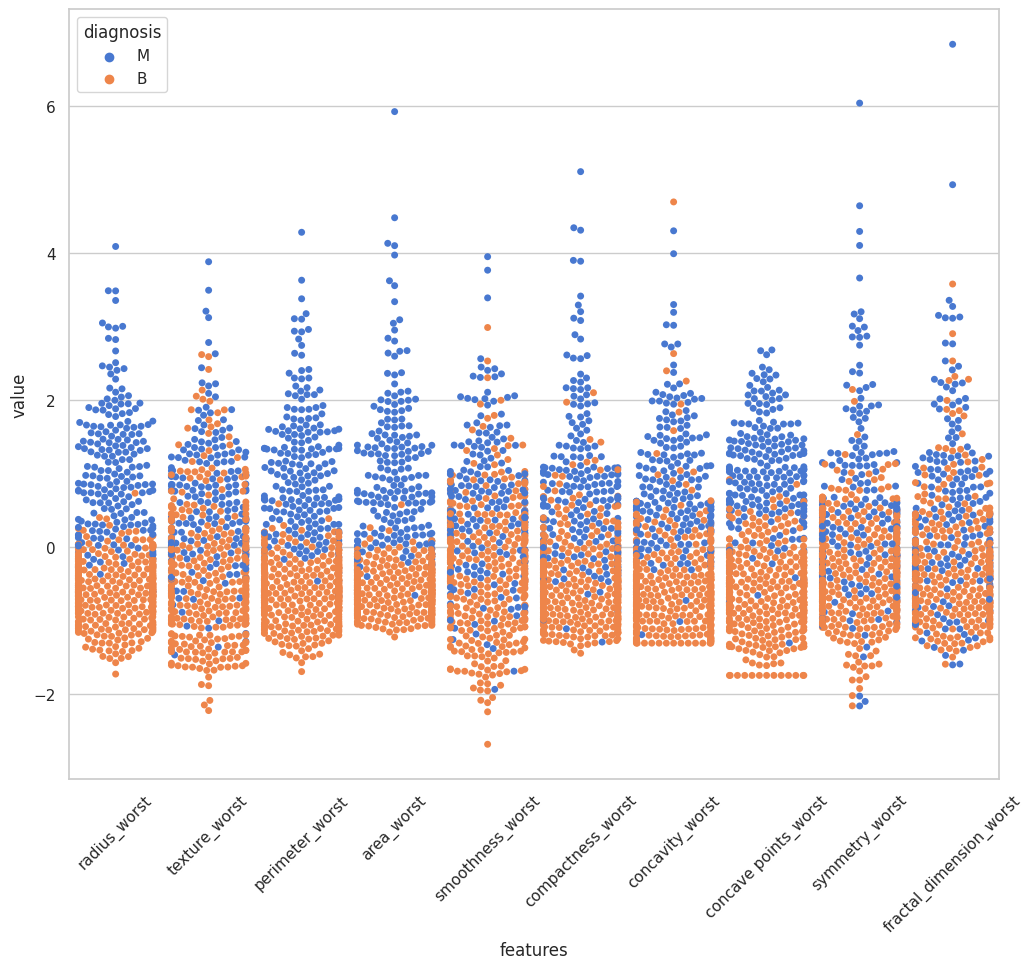

In [ ]:
features = pd.concat([y,features_stand.iloc[:,20:31]],axis=1)
features = pd.melt(features,
                   id_vars="diagnosis",
                   var_name="features",
                   value_name='value')

plt.figure(figsize=(12,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=features)
plt.xticks(rotation=45);

##Step 6: Observing all Pair-wise Correlation
Earlier, we discussed the relationships between data and the use of joint plot and pair grids to reveal and identify the patterns in our data. However, the use of joint plot and pair grids is to verify if there is a correlation between a number of pairs of features. For a general outlook, heatmaps are the best tool observe all pair-wise correlations in the data.

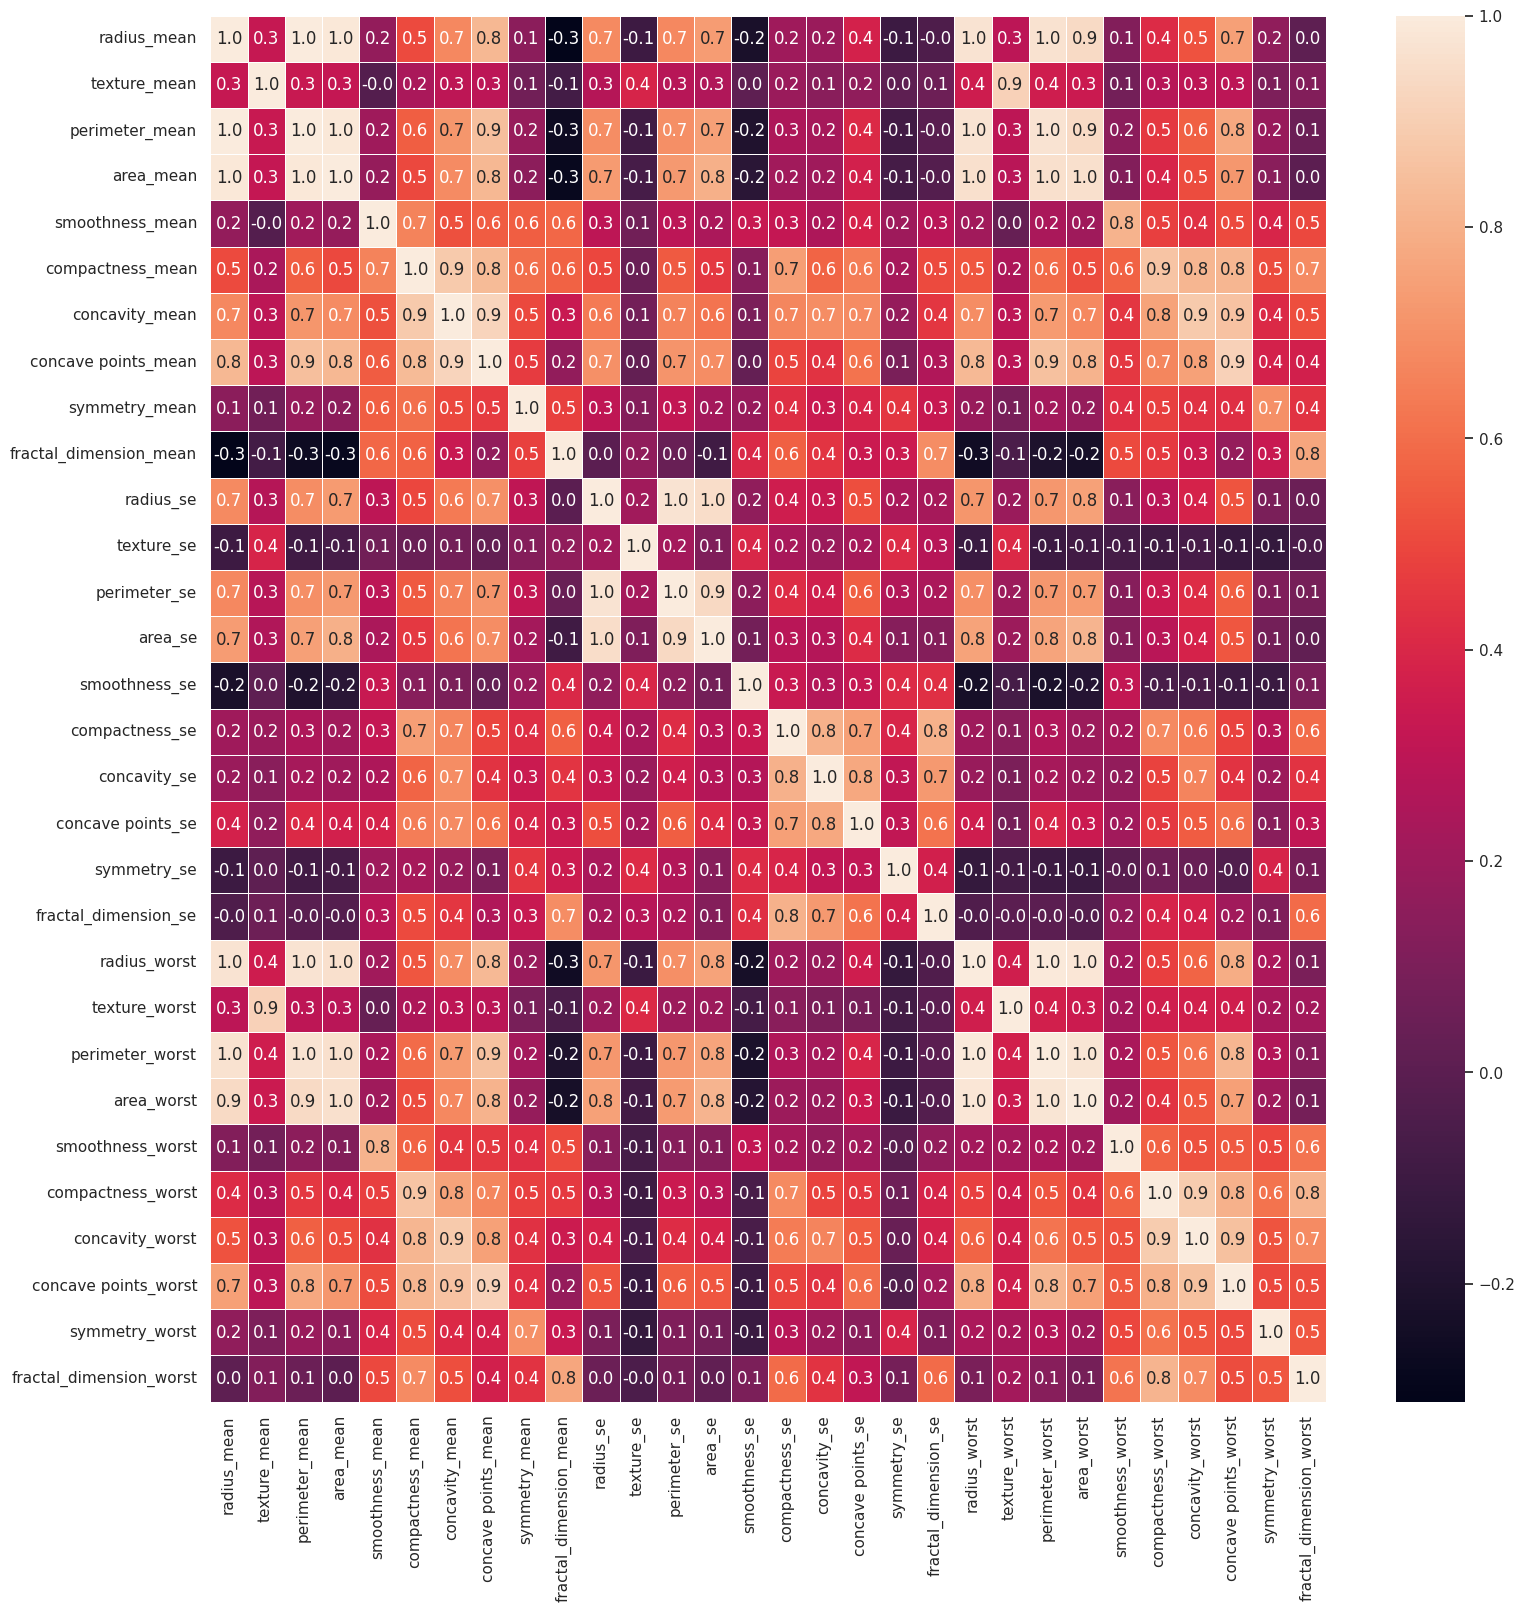

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax);

**What insights can we draw from this heat map?**

The darker the region, the weaker the correlation. The brighter the region, the stronger the correlation.


1.   (radius_worst, radius_mean)
2.   (perimeter_worst, radius_mean)
3.   (area_worst, radius_mean)
4.   (radius_worst, perimeter_mean)
5.   (perimeter_worst, perimeter_mean)
6.   (area_worst, perimeter_mean)
7.   (radius_worst, area_mean) The conglomorate of the bright squares are the combination of features that have a high correlation values (1.0, 0.9). We can choose which features to be discared from these pairs by removing one feature from each pair.






